## Copyright Note


**This lecture mainly examples are adapted from wiki and internet resources. Also, most of figures are from Reference 1--chapter 14** 

## Deep Learning Reference 1
**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book**: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition
by Aurélien Géron  (Author)[ relative links](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)


## Learning concepts:

1. Last lecture review.
2. CNN example with droupout.
3. Functional Wrapper to develop Conv2D
4. Conv1D

# [Paper uses CNN over clinical dataset](https://www.sciencedirect.com/science/article/pii/S1532046420301933)

In [ ]:
import tensorflow as tf

# Fashion-MNIST database of fashion articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

Label	          Description       
0	T-shirt/top      
1	Trouser     
2	Pullover    
3	Dress     
4	Coat    
5	Sandal  
6	Shirt   
7	Sneaker    
8	Bag     
9	Ankle boot  

In [ ]:
#Load the data


from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

To calculate the learnable parameters in Conv2D, all we have to do is just multiply the by the shape of width m, height n, previous layer’s filters d and account for all such filters k in the current layer. Don’t forget the bias term for each of the filter. Number of parameters in a CONV layer would be : ((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters). Where the term “filter” refer to the number of filters in the current layer.[link](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

In [ ]:
# Filters 32 and 64 and relu.. 3 layers

# Feature extraction using Conv2D
fashion_model = models.Sequential()
fashion_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(layers.MaxPooling2D((2, 2)))
fashion_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification using fully-connected NN
fashion_model.add(layers.Flatten())
fashion_model.add(layers.Dense(64, activation='relu'))        
fashion_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
fashion_model.summary()

In [ ]:
#What is -1 refers in the reshape

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model_train = fashion_model.fit(train_X, train_label, batch_size=64,epochs=20,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
import matplotlib.pyplot as plt
accuracy = fashion_model_train.history["accuracy"]
val_accuracy = fashion_model_train.history["val_accuracy"]
loss = fashion_model_train.history['loss']
val_loss = fashion_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# [Dropout Regularization]((https://arxiv.org/abs/1207.0580))

At every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being
temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set to 50%. After training, neurons don’t get dropped anymore.
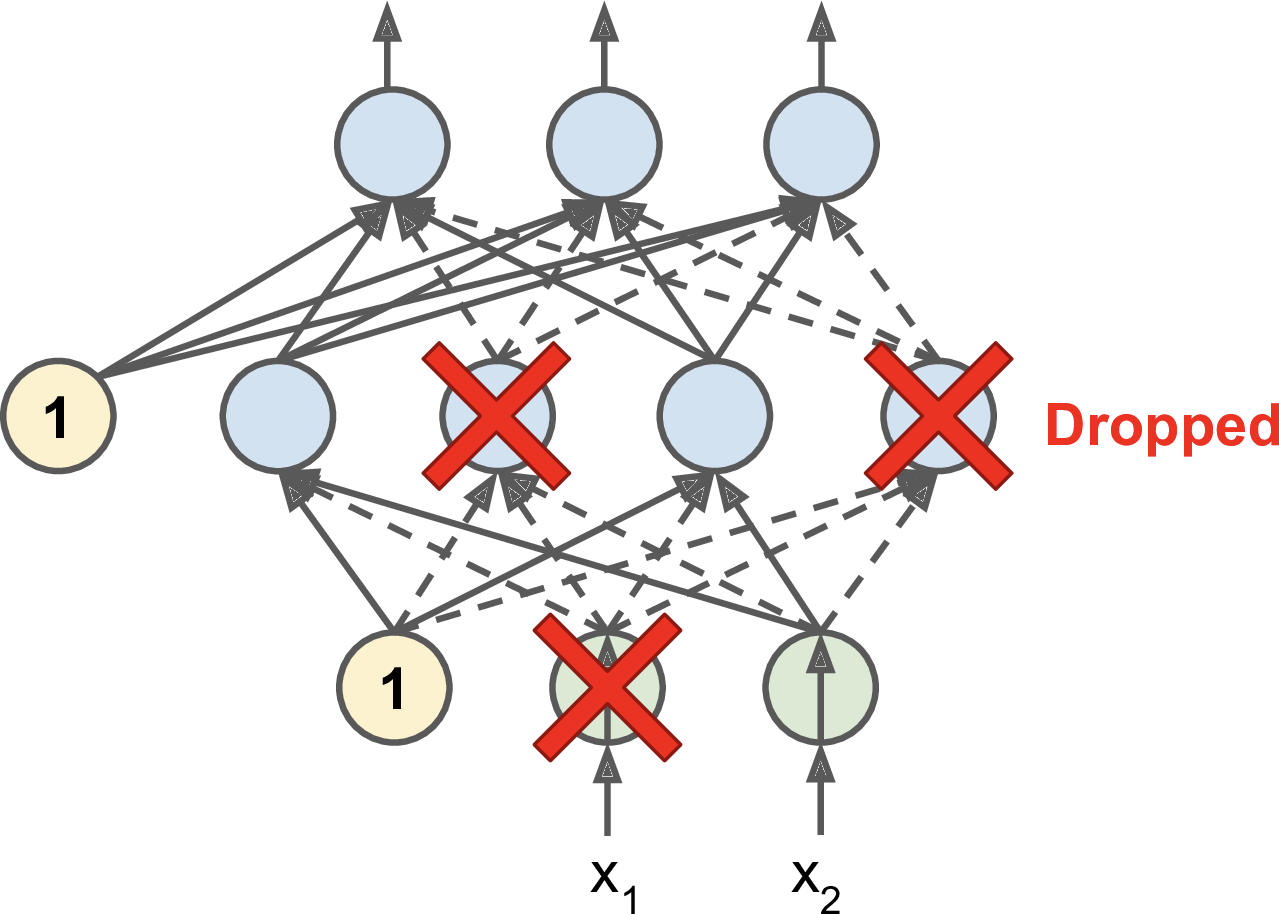[relative link](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

## Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

## Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).


In [ ]:
from tensorflow import keras
import tensorflow as tf

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def lrelu(x,alpha):
  return tf.nn.relu(x) - alpha * tf.nn.relu(-x)

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(keras.layers.Lambda(lrelu,arguments={'alpha':0.1}))         
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.summary()

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using Functional Wrapper

Using the partial() function to define a thin wrapper
around the Conv2D class, called DefaultConv2D: it simply avoids having to repeat the same hyperparameter values over and over again.

In [ ]:

from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation=keras.layers.Lambda(lrelu,arguments={'alpha':0.1}), padding="SAME")

fashion_model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
epochs = 20
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,AveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique

In [ ]:
iris = load_iris()
x, y = iris.data, iris.target
print(x.shape)


In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

In [ ]:
print(unique(y))
print(unique(y).sum())

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [ ]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(4,1)))
model.add(Conv1D(128,2, activation="relu"))
#model.add(MaxPooling1D())
model.add(AveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

In [ ]:
model.fit(xtrain, ytrain, batch_size=16,epochs=100, verbose=0)

acc = model.evaluate(xtrain, ytrain)
print("Loss:", acc[0], " Accuracy:", acc[1])

pred = model.predict(xtest)
pred_y = pred.argmax(axis=-1) # The index that will be returned by argmax will be taken from the last axis.

In [ ]:
pred_y

In [ ]:
cm = confusion_matrix(ytest, pred_y)
print(cm)

In [ ]:
# The known number of output classes.
num_classes = 3

model = Sequential()
model.add(Conv1D(64, 3, activation="relu", input_shape=(4,1)))
model.add(AveragePooling1D())
model.add(Conv1D(32,1, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

In [ ]:
# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(ytrain, num_classes)
y_test_binary = keras.utils.to_categorical(ytest, num_classes)

In [ ]:
batch_size = 256
epochs = 500
model = model.fit(xtrain, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xtest, y_test_binary))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
